In [1]:
import sys
import os
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
house_prices = pd.read_csv('train.csv')

In [3]:
house_prices.shape

(1460, 81)

In [4]:
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house_prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_prices.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
##checking null values

In [8]:
round(house_prices.isnull().sum()/len(house_prices.index),2).sort_values(ascending=False).head(18)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
BsmtFinType1    0.03
BsmtExposure    0.03
BsmtCond        0.03
BsmtQual        0.03
BsmtFinType2    0.03
MasVnrArea      0.01
MasVnrType      0.01
dtype: float64

In [9]:
round(house_prices.isnull().sum()/len(house_prices.index),2)[round(house_prices.isnull().sum()/
                                                                 len(house_prices.index),2).values>0.10]

LotFrontage    0.18
Alley          0.94
FireplaceQu    0.47
PoolQC         1.00
Fence          0.81
MiscFeature    0.96
dtype: float64

In [10]:
house_prices = house_prices.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

In [11]:
##missing value between 0-10%

In [12]:
round(house_prices.isnull().sum()/len(house_prices.index),2)[round(house_prices.isnull().sum()/
                                                                 len(house_prices.index),2).values>0.00]

MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

In [13]:
#Before going further we will try to convert the Year columns with the age where we are going to fill
#these columns with number , And if we query the max year for all these columns these will come out to be 2010 ,
#EX suppose the YearBuilt=2000 , Then YearBuiltOld = 2010-2000 =10

In [14]:
house_prices['YearBuilt_Old'] = house_prices.YearBuilt.max()-house_prices.YearBuilt
house_prices['YearRemodAdd_Old'] = house_prices.YearRemodAdd.max()-house_prices.YearRemodAdd
house_prices['GarageYrBlt_Old'] = house_prices.GarageYrBlt.max()-house_prices.GarageYrBlt
house_prices['YrSold_Old'] = house_prices.YrSold.max()-house_prices.YrSold
house_prices[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
49,1966,1966,1966.0,2007,44,44,44.0,3
590,2004,2004,2004.0,2008,6,6,6.0,2
339,1958,1998,1958.0,2009,52,12,52.0,1
190,1932,1994,1932.0,2007,78,16,78.0,3
736,1950,1950,1949.0,2006,60,60,61.0,4
938,2006,2006,2006.0,2006,4,4,4.0,4
840,1925,1950,1934.0,2008,85,60,76.0,2
1294,1955,1990,1957.0,2006,55,20,53.0,4
1348,1998,1998,1998.0,2007,12,12,12.0,3
263,1929,2001,1974.0,2010,81,9,36.0,0


In [15]:
#dropping Year columns

In [16]:
house_prices = house_prices.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [17]:
#missing values

In [18]:
house_prices.MasVnrType.fillna('None',inplace=True)
house_prices.MasVnrArea.fillna(house_prices.MasVnrArea.mean(),inplace=True)
house_prices.BsmtQual.fillna('TA',inplace=True)
house_prices.BsmtCond.fillna('TA',inplace=True)
house_prices.BsmtExposure.fillna('No',inplace=True)
house_prices.BsmtFinType1.fillna('Unf',inplace=True)
house_prices.BsmtFinType2.fillna('Unf',inplace=True)
house_prices.GarageType.fillna('Attchd',inplace=True)
house_prices.GarageYrBlt_Old.fillna(-1,inplace=True)
house_prices.GarageFinish.fillna('Unf',inplace=True)
house_prices.GarageQual.fillna('TA',inplace=True)
house_prices.GarageCond.fillna('TA',inplace=True)

In [19]:
house_prices.Street.value_counts()
house_prices.Utilities.value_counts()
house_prices = house_prices.drop(['Street','Utilities'],axis='columns')

In [20]:
#dropping id column
house_prices = house_prices.drop('Id',axis='columns')

In [21]:
house_prices[list(house_prices.dtypes[house_prices.dtypes!='object'].index)].describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,10.000000,6.000000,7.000000,1.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,56.000000,43.000000,48.000000,3.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


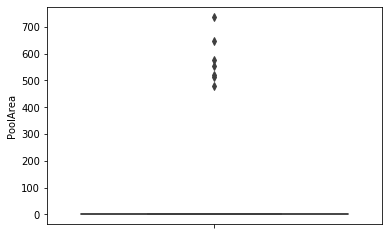

In [22]:
sns.boxplot(y = house_prices['PoolArea'])

In [23]:
house_prices['WoodDeckSF'].value_counts()

0      761
192     38
100     36
144     33
120     31
      ... 
269      1
265      1
263      1
260      1
215      1
Name: WoodDeckSF, Length: 274, dtype: int64

In [24]:
#EDA

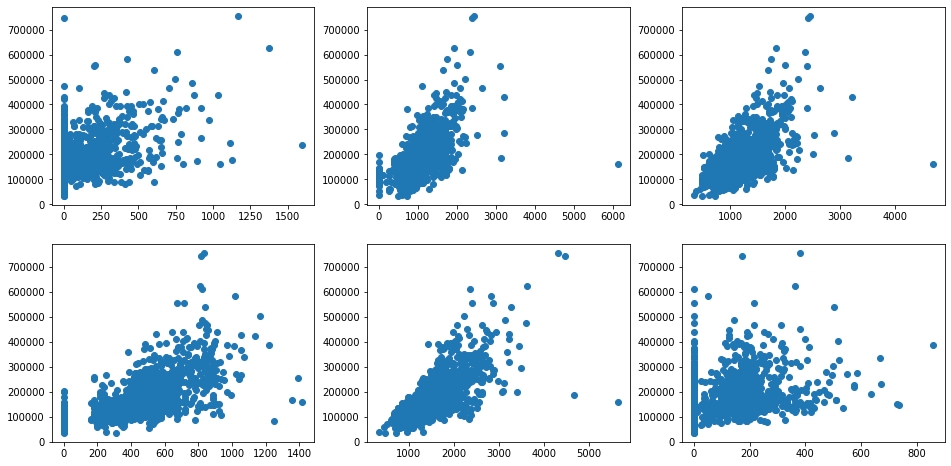

In [25]:
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
plt.scatter(house_prices.MasVnrArea,house_prices.SalePrice)
plt.subplot(2,3,2)
plt.scatter(house_prices.TotalBsmtSF,house_prices.SalePrice)
plt.subplot(2,3,3)
plt.scatter(house_prices['1stFlrSF'],house_prices.SalePrice)
plt.subplot(2,3,4)
plt.scatter(house_prices['GarageArea'],house_prices.SalePrice)
plt.subplot(2,3,5)
plt.scatter(house_prices['GrLivArea'],house_prices.SalePrice)
plt.subplot(2,3,6)
plt.scatter(house_prices['WoodDeckSF'],house_prices.SalePrice)

In [26]:
#heatmap

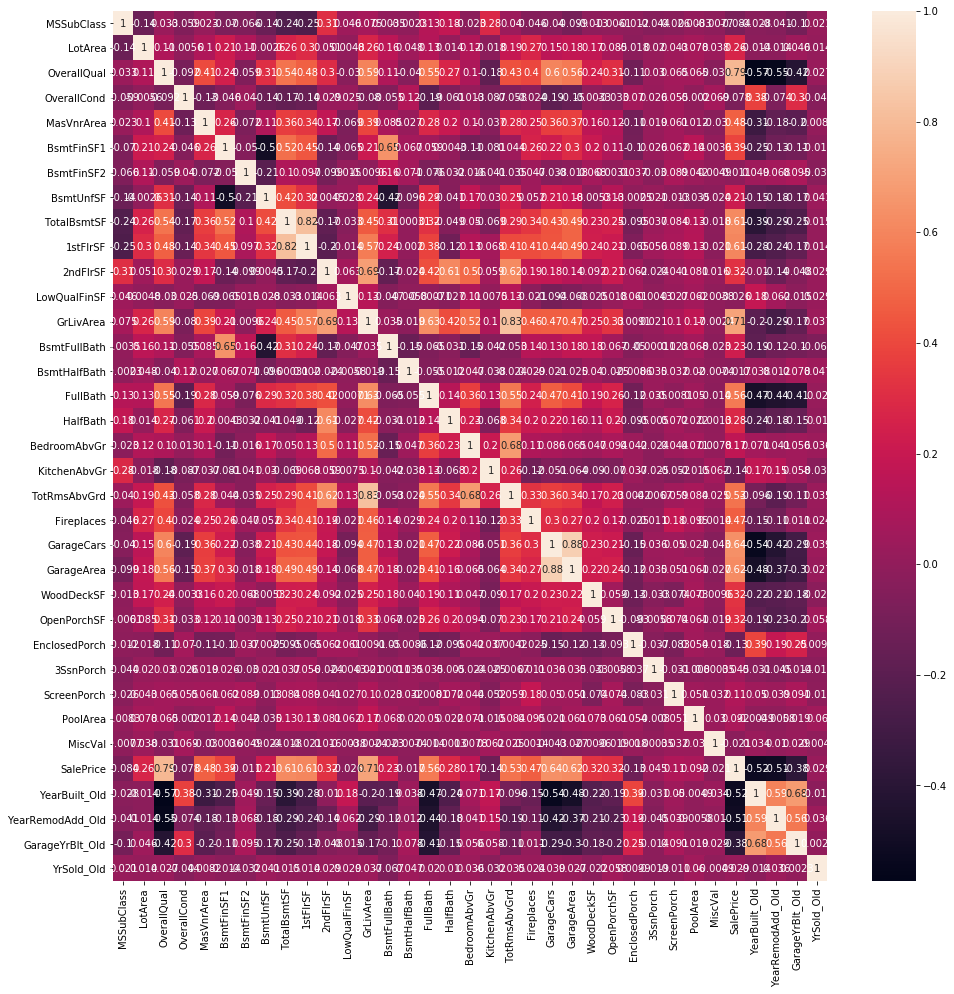

In [27]:
plt.figure(figsize=(16,16))
sns.heatmap(house_prices[list(house_prices.dtypes[house_prices.dtypes!='object'].index)].corr(),annot=True)
plt.show()

In [28]:
house_prices.shape

(1460, 71)

In [29]:
num_col = list(house_prices.dtypes[house_prices.dtypes !='object'].index)
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_prices = drop_outliers(house_prices)

In [30]:
house_prices.shape

(1441, 71)

In [31]:
house_prices[list(house_prices.dtypes[house_prices.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [32]:
# oridinal columns

In [33]:
house_prices['LandSlope'] = house_prices.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
house_prices['ExterQual'] = house_prices.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices['BsmtQual'] = house_prices.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_prices['BsmtCond'] = house_prices.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_prices['BsmtExposure'] = house_prices.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_prices['BsmtFinType1'] = house_prices.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_prices['BsmtFinType2'] = house_prices.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_prices['HeatingQC'] = house_prices.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices['CentralAir'] = house_prices.CentralAir.map({'N':0,'Y':1})
house_prices['KitchenQual'] = house_prices.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices['GarageFinish'] = house_prices.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
house_prices['GarageQual'] = house_prices.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_prices['GarageCond'] = house_prices.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_prices['ExterCond'] = house_prices.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_prices['LotShape'] = house_prices.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

In [34]:
#After mapping the columns

In [35]:
house_prices[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [36]:
# creating dummy columns

In [37]:
dummy_col = pd.get_dummies(house_prices[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

house_prices = pd.concat([house_prices,dummy_col],axis='columns')

house_prices = house_prices.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

In [38]:
# looking at the target variable's distribution

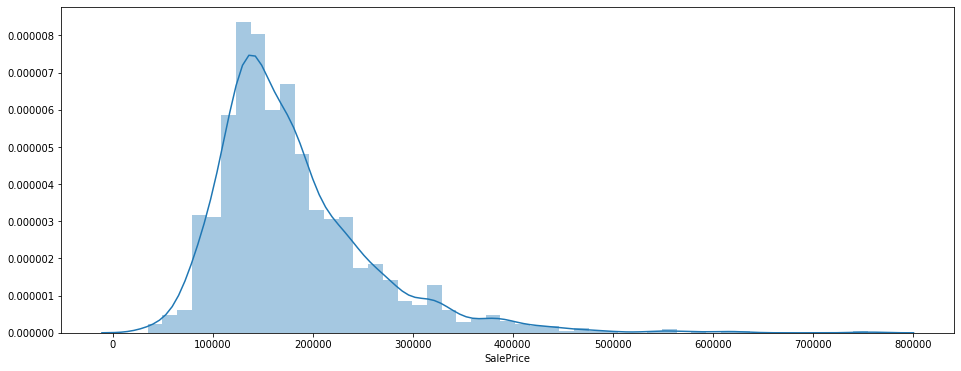

In [39]:
plt.figure(figsize=(16,6))
sns.distplot(house_prices.SalePrice)
plt.show()


In [40]:
# train and test data split

In [41]:
df_train,df_test = train_test_split(house_prices,train_size=0.7,test_size=0.3,random_state=42)

In [42]:
house_prices[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


In [43]:
#scaling of train dataset

In [44]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [45]:
# checking distribution after splitting

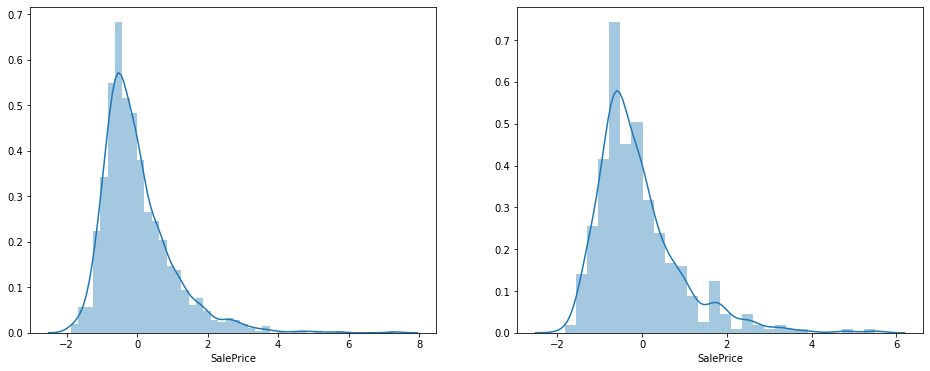

In [46]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(df_train.SalePrice)
plt.subplot(122)
sns.distplot(df_test.SalePrice)

In [47]:
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [48]:
# Top 25 features using RFE

In [49]:
len(X_train.columns)

192

In [50]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,25)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=25, step=1, verbose=0)

In [51]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [52]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)

In [53]:
# split train and test dataset using selected columns 

X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

In [54]:
#Lasso Regression Model

In [55]:

lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8495834402552
0.8189276974517083


In [56]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.074),
 ('LotArea', 0.248),
 ('LotShape', 0.244),
 ('LandSlope', 0.191),
 ('OverallQual', 0.275),
 ('OverallCond', 0.307),
 ('MasVnrArea', 0.284),
 ('ExterQual', 0.323),
 ('ExterCond', 0.46),
 ('BsmtQual', 0.547),
 ('BsmtCond', 0.315),
 ('BsmtExposure', -1.838),
 ('BsmtFinType1', -0.406),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 1.625),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.182),
 ('HeatingQC', -0.004),
 ('CentralAir', -0.0),
 ('1stFlrSF', 0.233),
 ('2ndFlrSF', 0.023),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.46),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', 0.171)]

In [57]:
#lets try to improve our model with the optimal value of alpha using GridSearchCV

In [58]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [59]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004611,0.001768,0.001792,0.000559,0.001,{'alpha': 0.001},0.778278,0.866967,0.785566,0.832444,...,0.854187,0.851372,0.849783,0.849057,0.847343,0.862786,0.849646,0.845617,0.851176,0.004782
1,0.003170,0.000123,0.001201,0.000069,0.010,{'alpha': 0.01},0.753080,0.822163,0.798460,0.809533,...,0.805825,0.804753,0.802715,0.801776,0.799642,0.828914,0.805875,0.798074,0.805993,0.008244
2,0.004126,0.000720,0.001656,0.000460,0.100,{'alpha': 0.1},0.639679,0.766856,0.726791,0.727353,...,0.735366,0.741258,0.740459,0.740292,0.731213,0.767388,0.738014,0.733909,0.741049,0.009750
3,0.003592,0.000842,0.001384,0.000408,1.000,{'alpha': 1.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003429,0.000901,0.001405,0.000363,5.000,{'alpha': 5.0},-0.006496,-0.021566,-0.018063,-0.001154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


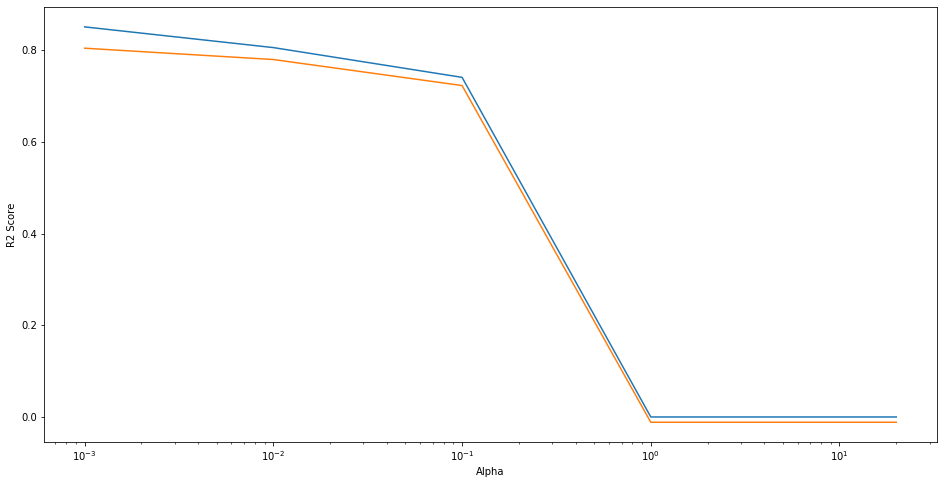

In [60]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [61]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [62]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8495834402552
0.8189276974517083


In [63]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [64]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
15,BsmtFinSF2,1.625115
9,BsmtQual,0.547221
8,ExterCond,0.460325
23,GrLivArea,0.460029
7,ExterQual,0.323152
10,BsmtCond,0.314985
5,OverallCond,0.307250
6,MasVnrArea,0.283749
4,OverallQual,0.274734
1,LotArea,0.247985


In [65]:
#Ridge Regression Model

In [66]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.853546772302263
0.8063124874685226


In [67]:
#lets try to improve our model with the optimal value of alpha using GridSearchCV

In [68]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [69]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004875,0.001183,0.002280,0.000838,0.001,{'alpha': 0.001},0.782839,0.869633,0.742609,0.835492,...,0.859153,0.855247,0.853372,0.853328,0.851646,0.865824,0.853600,0.849574,0.855086,0.004564
1,0.003675,0.000995,0.001588,0.000576,0.010,{'alpha': 0.01},0.782858,0.869619,0.745264,0.835456,...,0.859150,0.855246,0.853371,0.853327,0.851645,0.865824,0.853599,0.849574,0.855085,0.004564
2,0.004234,0.001461,0.001767,0.000439,0.100,{'alpha': 0.1},0.783024,0.869454,0.767834,0.835114,...,0.858889,0.855191,0.853315,0.853268,0.851583,0.865800,0.853539,0.849517,0.855010,0.004555
3,0.004845,0.001060,0.002216,0.001074,0.200,{'alpha': 0.2},0.783166,0.869220,0.786385,0.834768,...,0.858273,0.855045,0.853168,0.853111,0.851423,0.865738,0.853381,0.849368,0.854822,0.004542
4,0.003732,0.000855,0.001463,0.000309,0.500,{'alpha': 0.5},0.783390,0.868303,0.818662,0.833893,...,0.855665,0.854296,0.852411,0.852308,0.850612,0.865420,0.852565,0.848600,0.853907,0.004560


In [70]:
cv_result_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004875,0.001183,0.002280,0.000838,0.001,{'alpha': 0.001},0.782839,0.869633,0.742609,0.835492,...,0.859153,0.855247,0.853372,0.853328,0.851646,0.865824,0.853600,0.849574,0.855086,0.004564
1,0.003675,0.000995,0.001588,0.000576,0.010,{'alpha': 0.01},0.782858,0.869619,0.745264,0.835456,...,0.859150,0.855246,0.853371,0.853327,0.851645,0.865824,0.853599,0.849574,0.855085,0.004564
2,0.004234,0.001461,0.001767,0.000439,0.100,{'alpha': 0.1},0.783024,0.869454,0.767834,0.835114,...,0.858889,0.855191,0.853315,0.853268,0.851583,0.865800,0.853539,0.849517,0.855010,0.004555
3,0.004845,0.001060,0.002216,0.001074,0.200,{'alpha': 0.2},0.783166,0.869220,0.786385,0.834768,...,0.858273,0.855045,0.853168,0.853111,0.851423,0.865738,0.853381,0.849368,0.854822,0.004542
4,0.003732,0.000855,0.001463,0.000309,0.500,{'alpha': 0.5},0.783390,0.868303,0.818662,0.833893,...,0.855665,0.854296,0.852411,0.852308,0.850612,0.865420,0.852565,0.848600,0.853907,0.004560
5,0.003089,0.000164,0.001307,0.000129,0.900,{'alpha': 0.9},0.783396,0.866817,0.836750,0.832990,...,0.852113,0.852973,0.851080,0.850894,0.849203,0.864839,0.851123,0.847246,0.852398,0.004742
6,0.003045,0.000138,0.001263,0.000096,1.000,{'alpha': 1.0},0.783365,0.866426,0.839196,0.832798,...,0.851301,0.852622,0.850727,0.850519,0.848831,0.864680,0.850742,0.846886,0.852010,0.004803
7,0.003095,0.000149,0.001253,0.000097,5.000,{'alpha': 5.0},0.779928,0.854117,0.840771,0.828895,...,0.835522,0.841259,0.839325,0.838613,0.836970,0.858449,0.839024,0.835297,0.840588,0.006497
8,0.003262,0.000340,0.001302,0.000110,10.000,{'alpha': 10.0},0.775804,0.846751,0.830937,0.826461,...,0.828540,0.833372,0.831442,0.830644,0.828803,0.853088,0.831495,0.827318,0.833121,0.007134
9,0.003154,0.000442,0.001317,0.000192,20.000,{'alpha': 20.0},0.769493,0.839721,0.821282,0.822796,...,0.821197,0.824520,0.822692,0.822039,0.819719,0.846366,0.823216,0.818485,0.824814,0.007627


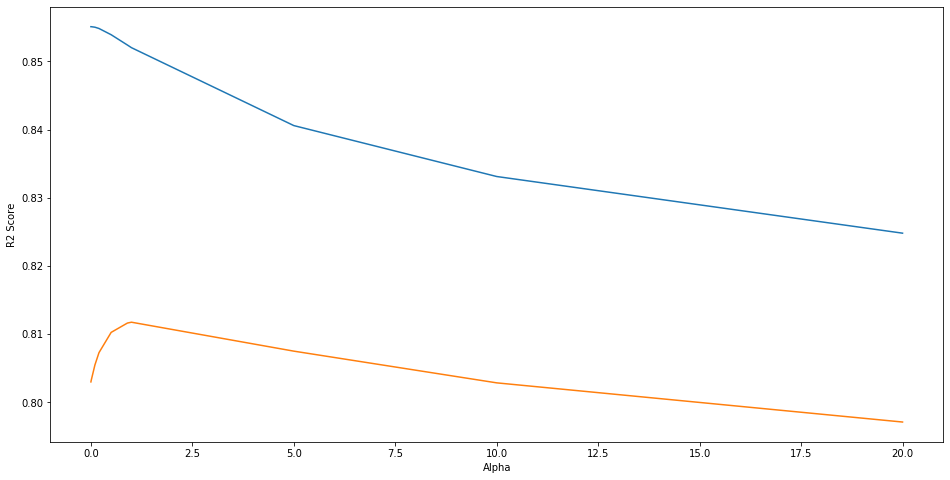

In [71]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

In [72]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [73]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8511178020486034
0.8167289841689327


In [74]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [75]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
15,BsmtFinSF2,1.500721
9,BsmtQual,0.559797
23,GrLivArea,0.505286
8,ExterCond,0.477232
10,BsmtCond,0.362433
7,ExterQual,0.346849
13,BsmtFinSF1,0.344554
5,OverallCond,0.312273
6,MasVnrArea,0.287190
4,OverallQual,0.274015


In [76]:
# For both the models in Ridge and Lasso, r2_score is almost same.

In [77]:
# We will consider the model created using Lasso Regression because it will penalize more on the dataset and can also help in feature elemination

In [78]:
# Final Model

In [79]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8495834402552
0.8189276974517083


In [80]:
# Best alpha value for Lasso : {'alpha': 0.001}

In [81]:
# Best alpha value for Ridge : {'alpha': 1.0}